<a href="https://colab.research.google.com/github/Danazzz/beras-scm/blob/main/v.3/DeepLearning/Time_series_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
import zipfile, os
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 15, 6            #agar semua plot ukurannya sama
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Specify the path to your CSV file
!wget https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/csv/Beras.csv

--2024-05-05 20:33:38--  https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/csv/Tabel%20Harga%20Berdasarkan%20Daerah%20Jabar.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78129 (76K) [text/plain]
Saving to: ‘Tabel Harga Berdasarkan Daerah Jabar.csv.6’

Tabel Harga Berdasa 100%[===================>]  76.30K  --.-KB/s    in 0.009s  

2024-05-05 20:33:38 (7.98 MB/s) - ‘Tabel Harga Berdasarkan Daerah Jabar.csv.6’ saved [78129/78129]

--2024-05-05 20:33:38--  https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/csv/export-produsen-2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.

In [ ]:
df_beras = pd.read_csv('Beras.csv')
df_beras

,Tanggal,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
0,2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
1,2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2,2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
3,2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
4,2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...,...
673,2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
674,2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
675,2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598
676,2023-12-28,30,6650,6760,8020,13120,14391,14000,5444,6800,17598


In [ ]:
# df_beras['Komoditas'] = pd.to_datetime(df_beras['Komoditas'], format='%d/ %m/ %Y')
df_beras.set_index('Tanggal', inplace=True)
#check datatype of index
df_beras.index

Index(['2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
       '2021-03-22', '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
       ...
       '2023-12-14', '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
       '2023-12-21', '2023-12-22', '2023-12-27', '2023-12-28', '2023-12-29'],
      dtype='object', name='Tanggal', length=678)

In [ ]:
df_beras

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
Tanggal,,,,,,,,,,
2021-03-15,10,4000,4150,5050,9465,14419,11200,4960,9600,17161
2021-03-16,10,3850,4100,4740,9360,14419,11200,4960,9600,17161
2021-03-17,10,4160,4230,4950,9400,14419,11200,4960,9600,17161
2021-03-18,10,4120,4190,4730,9340,14419,11200,4960,9600,17161
2021-03-19,10,4190,4290,4990,9410,14419,11200,4960,9600,17161
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,30,6770,6850,7980,13100,14391,14000,5444,6800,17598
2023-12-22,30,6600,6760,8050,13095,14391,14000,5444,6800,17598
2023-12-27,30,6620,6760,8030,13120,14391,14000,5444,6800,17598


In [ ]:
df_beras = df_beras.astype('float')
# df_beras = df_beras.drop(columns=['Stok GKG Tingkat Penggilingan', 'Stok Beras Tingkat Penggilingan'])
df_beras

,Luas Panen Padi,GKP Tingkat Petani,GKP Tingkat Penggilingan,GKG Tingkat Penggilingan,Harga Beras Penggilingan,Produksi Beras,Harga Beras,UMP,BBM Solar,Tingkat Konsumsi
Tanggal,,,,,,,,,,
2021-03-15,10.0,4000.0,4150.0,5050.0,9465.0,14419.0,11200.0,4960.0,9600.0,17161.0
2021-03-16,10.0,3850.0,4100.0,4740.0,9360.0,14419.0,11200.0,4960.0,9600.0,17161.0
2021-03-17,10.0,4160.0,4230.0,4950.0,9400.0,14419.0,11200.0,4960.0,9600.0,17161.0
2021-03-18,10.0,4120.0,4190.0,4730.0,9340.0,14419.0,11200.0,4960.0,9600.0,17161.0
2021-03-19,10.0,4190.0,4290.0,4990.0,9410.0,14419.0,11200.0,4960.0,9600.0,17161.0
...,...,...,...,...,...,...,...,...,...,...
2023-12-21,30.0,6770.0,6850.0,7980.0,13100.0,14391.0,14000.0,5444.0,6800.0,17598.0
2023-12-22,30.0,6600.0,6760.0,8050.0,13095.0,14391.0,14000.0,5444.0,6800.0,17598.0
2023-12-27,30.0,6620.0,6760.0,8030.0,13120.0,14391.0,14000.0,5444.0,6800.0,17598.0


In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 3
X, y = df_to_X_y(df_beras['Harga Beras'], WINDOW_SIZE)
X.shape, y.shape

((675, 3, 1), (675,))

In [ ]:
#use minmaxscaler to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(675, 3))
y = scaler.fit_transform(y.reshape(-1,1))
# df5_scaled = pd.DataFrame(df5_scaled, index=df_imputed.index, columns=df_imputed.columns)
# df5_scaled = pd.DataFrame(df5_scaled, columns=df_imputed.columns)

y

array([[0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.01754386],
       [0.017

In [ ]:
q_80 = int(len(X) * .8)

X_train, y_train = X[:q_80], y[:q_80]
X_test, y_test = X[q_80:], y[q_80:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((540, 3), (540, 1), (135, 3), (135, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
17/17 [==============================] - 3s 6ms/step - loss: 0.0382 - mean_absolute_error: 0.1229
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.1068
Epoch 3/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.1040
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0513
Epoch 5/1000
17/17 [==============================] - 0s 5ms/step - loss: 5.4305e-04 - mean_absolute_error: 0.0148
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 3.8067e-04 - mean_absolute_error: 0.0104
Epoch 7/1000
17/17 [==============================] - 0s 6ms/step - loss: 3.3919e-04 - mean_absolute_error: 0.0076
Epoch 8/1000
17/17 [==============================] - 0s 5ms/step - loss: 3.3588e-04 - mean_absolute_error: 0.0073
Epoch 9/1000
17/17 [==============================] - 0s 5ms/step - loss: 3.2167e-04 - mean_abso

17/17 [==============================] - 0s 2ms/step


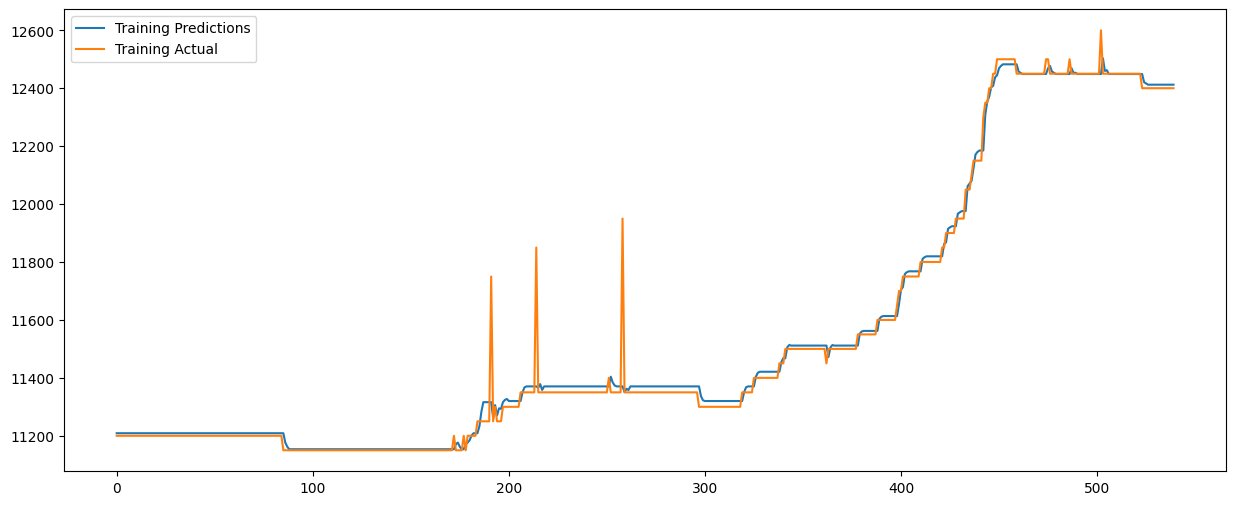

In [ ]:
train_predictions = model.predict(X_train).flatten()
train_predictions_inv = scaler.inverse_transform(train_predictions.reshape(-1,1))

plt.plot(train_predictions_inv)
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)))
# plt.plot(dates_train, train_predictions)
# plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Actual'])

5/5 [==============================] - 0s 3ms/step


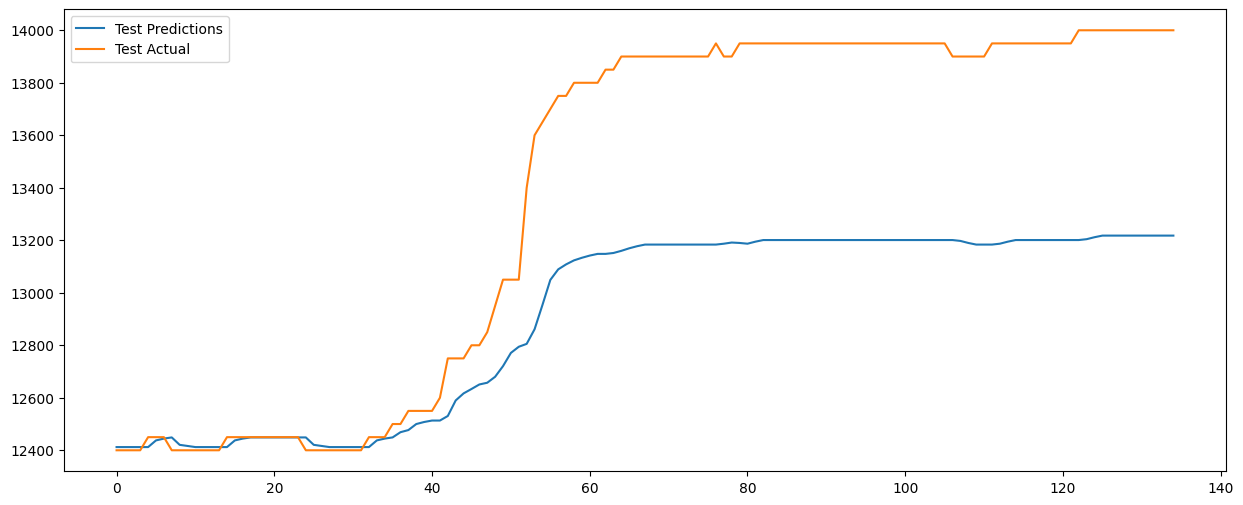

In [ ]:
test_predictions = model.predict(X_test).flatten()
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test)

plt.plot(test_predictions_inv)
plt.plot(y_test_inv)
plt.legend(['Test Predictions', 'Test Actual'])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

rmse = sqrt(mean_squared_error(test_predictions_inv,y_test_inv))
mae = mean_absolute_error(test_predictions_inv,y_test_inv)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(test_predictions_inv,y_test_inv)

# Mean Magnitude of Relative Error
mmre = (abs((test_predictions_inv - y_test_inv) / y_test_inv)).mean()

# Median Magnitude of Relative Error
mdmre = np.median(abs((test_predictions_inv - y_test_inv) / y_test_inv))

# Mean Magnitude of Error Relative
mmer = (abs(test_predictions_inv - y_test_inv)).mean()

# Mean Square Error
mse = mean_squared_error(test_predictions_inv, y_test_inv)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre))
print("Mean Magnitude of Error Relative: ", mmer)
print("Mean Square Error:", mse)

Root Mean Square Error: 581.8893771480657
Mean Absolute Error: 475.42675057870406
R Square: -1.7910
Mean Magnitude of Relative Error: 0.0343
Median Magnitude of Relative Error: 0.0513
Mean Magnitude of Error Relative:  475.42675057870406
Mean Square Error: 338595.24723776383
